K-means classification is very useful for condensing a wide spread of continuous data into a few distict categories. K-means itself identifies the nature and cohesiveness of said categories. 

Try to sort location coordinates into regions.
Try to sort patients by commonalities.

Data availablie from:
https://www.kaggle.com/gpreda/california-immunization-rates-and-pertussis-cases

In [1]:
import  numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

First, I run K-Means clustering on the geoData coordinate dataset. This allows us to collapse a wide range of locations into a handful of different categories.

The closer the silhouette score is to 1, the better the clusters.

In [2]:
geo = pd.read_csv("geoData.csv")

For 3 clusters the silhouette score is: 0.908


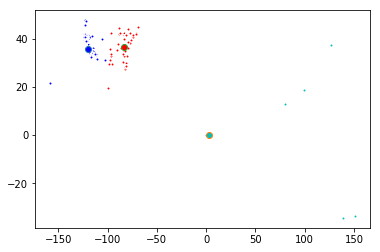

In [3]:
# will classify only by latitude and longitude data, so drop the others
geo.drop(['school_code', 'countyMatch', 'isSchool'],inplace=True,axis=1) 

# convert geo dataframe to np array so it plays nice with scikit
dat_data = geo.values
n_clusters = 3

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r'] #colors for our three clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()

I picked 3 on a whim, but a silhouette score of 0.908 is pretty darn good. The graph shows us two distinct clusters (red and blue), with a smattering of outliers being grouped into green.

Closer analysis of these outliers, to determine if they should be disgarded or merely considered separately, is advised.

We drop all datapoints with extreme longitudinal outliers (longitude > -10) and try again.

For 2 clusters the silhouette score is: 0.907


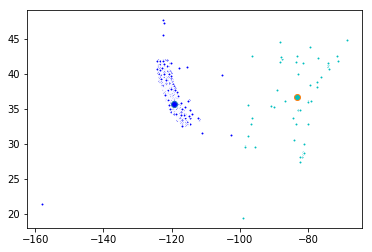

In [4]:
trimGeo = geo.drop(geo[geo['longitude'] > -10].index)

# convert geo dataframe to np array so it plays nice with scikit
dat_data = trimGeo.values
n_clusters = 2

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r', 'm'] #colors for our clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()

Now we are reduced to two distinct clusters with a slightly higher silhouette now that the outliers are gone. Seeing as this data is graphed by longitude vs latitude, it may be worth identifying where these points fall on an actual map and determining the different regional traits of each cluster (eg county? neighborhood?).

Of course, the whole point of the geoData was to /expand/ things sorted by county into more precice coordinates, allowing map distance between data points to factor into calculations.

The school_code variable is common between geoData and StudentData. If we can establish a relation between school immunization and outbreaks, we can establish a relation between outbreaks and geographical distance (eg. how far a given outbreak spreads).

Schools could be mapped in a scatterplot, with datapoint color indicating the level of immunization. One plot can be built per vaccine type. Riskiness can then be added as a variable to geoData and mapped accordingly.

StudentData Features:
- n - number of students
- nMMR - number of students reporting MMR vaccination
- nDTP - ''' DTP vaccine
- nPolio - ''' polio vaccine
- nPBE - number of students citing personal beliefs exemption from vaccines
- nPME - ''' medical exemption from vaccines
- COUNTY - county where row data was recorded
- SCHOOL - school '''
- schoolType - public or private institution
- year - year of polling
- school_code - index tag, maps to coordinates in geoCode

PertusisCases Features - 
- number of cases and incident rates of pertussis per year
- county of each statistic

pertussis rate to county to school to coordinate

In [17]:
# read in StudentData dataset
student = pd.read_csv("StudentData.csv", encoding = 'latin1')

student

,schoolType,COUNTY,SCHOOL,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,A CHILD'S WORLD MONTE,7092463,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,ACAD,6972533,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,27,27,27,0,0,2006
5,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,27,27,27,0,0,2008
6,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,30,29,29,29,0,0,2002
7,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,31,24,31,31,0,0,2007
8,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,32,27,32,32,0,0,2003
9,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,36,33,34,35,1,0,2001


In [6]:
# create new columns giving percentage of vaccines out of total population
student['pMMR'] = student['nMMR'] / student['n']
student['pDTP'] = student['nDTP'] / student['n']
student['pPolio'] = student['nPolio'] / student['n']
student['pPBE'] = student['nPBE'] / student['n']
student['pPME'] = student['nPME'] / student['n']

In [11]:
#student.corr()

Parameterization of the vaccine rates reveals a strong correlation between receiving a vaccine for one disease and receiving a vaccine for the other two. Thus, data pertaining to MMR and DTP can be safely dropped. I chose polio as the one to keep simply because it's not an acronym and that makes it easier for me to mentally keep track of.

In [10]:
# drop the unneeded data
student.drop(['nMMR', 'nDTP', 'pMMR', 'pDTP', 'SCHOOL', 'schoolType'],inplace=True,axis=1) 

Now we collapse the geoData coordinates into StudentData, using the variable school_code as a map.

In [13]:
geo = pd.read_csv("geoData.csv")
geo.drop(['countyMatch', 'isSchool'],inplace=True,axis=1) 

In [16]:
student.set_index('school_code')
geo.set_index('school_code')
mapStudent = pd.concat([student, geo], axis=1)

#mapStudent

Unfortunately, it's not that simple. Because StudentData also gathered data by the year, there exist multiple entries for each school. We collapse the data by averaging the numeric variables across the years.